# Task 1
## Team 15
- Ahmed Hossam Sedky
- Ahmed Mohamed Abdelfattah
- Ehab Wahba Abdelrahman
- Mo'men Maged Mohamed
- Mohaned Alaa Ragab

**Import numpy and the required image processing functions**

*Note: cv2 is only imported to open the image and get its dimensions*

In [1]:
# from libs import normalization, equalization, filters, noise, graphs, edge_detection, threshold
from libs import normalization, equalization, filters, noise, graphs, edge_detection, threshold, fft ,hough
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import (hough_line_peaks,hough_line)

**Open the image**

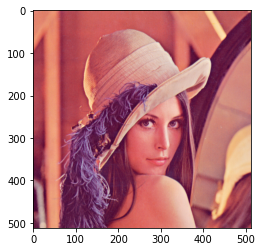

In [2]:
image = cv2.imread("images/lenna.png")
# Rearrange RGB channels to use the image matrix correctly in matplotlib
b, g, r = cv2.split(image)
image = cv2.merge((r,g,b))
plt.imshow(image)
plt.show()

Transform image from RGB to grayscale

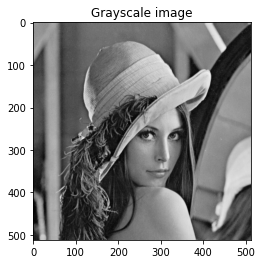

In [3]:
grayscale_image = filters.grayscale(image)
plt.imshow(grayscale_image, cmap = "gray")
plt.title("Grayscale image")
plt.show()

**Add noise to the image**

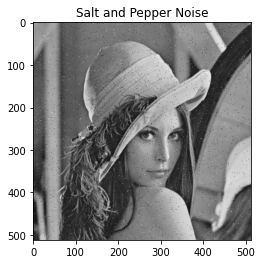

In [4]:
# Salt and Pepper noise
sp_noise_image = noise.sp_noise(grayscale_image)
plt.imshow(sp_noise_image, cmap="gray")
plt.title("Salt and Pepper Noise")
plt.show()

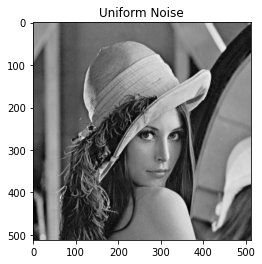

In [5]:
# Uniform noise
uniform_noise_image = noise.uniform_noise(grayscale_image)
plt.imshow(uniform_noise_image, cmap="gray")
plt.title("Uniform Noise")
plt.show()

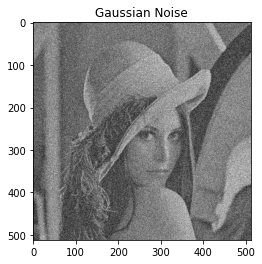

In [6]:
# Gaussian noise
gaussian_noise_image = noise.gauss_noise(grayscale_image)
plt.imshow(gaussian_noise_image, cmap="gray")
plt.title("Gaussian Noise")
plt.show()

**Call the filters functions**

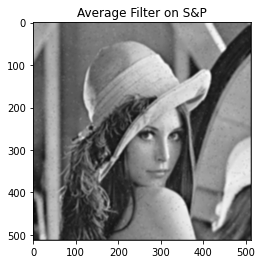

In [7]:
# Average Filter
# The average filter function takes 2 arguments, a gray-scaled image and the kernel size
# We can test the filter on the sp image using a 5x5 kernel
plt.imshow(filters.average_filter(sp_noise_image,5), cmap="gray")
plt.title("Average Filter on S&P")
plt.show()

Now let's test the median filter on the same image

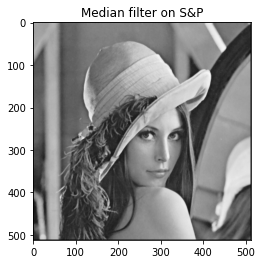

In [8]:
# The median filter function takes only 1 argument which is a gray-scaled image
plt.imshow(filters.median_filter(grayscale_image), cmap="gray")
plt.title("Median filter on S&P")
plt.show()

We can see that all of the salt and pepper noise were removed.  
We will then test the gaussian blur filter on the raw image

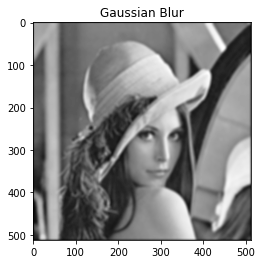

In [9]:
# The gaussian blur function takes 3 arguments (grayScaleImage, kernelSize, standard deviation)
gaussian_blurred_image = filters.gaussian_filter(grayscale_image,9,3)
plt.imshow(gaussian_blurred_image, cmap="gray")
plt.title("Gaussian Blur")
plt.show()

Then we can use the edge detection algorithms
1. Prewitt
2. Roberts
3. Sobel
4. Canny

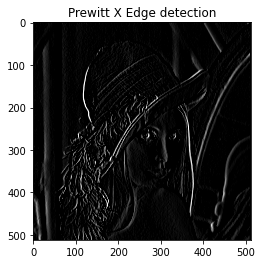

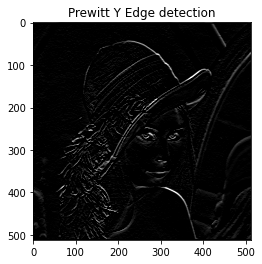

In [10]:
# Prewitt
prewitt_x,prewitt_y = edge_detection.prewitt(grayscale_image) 
plt.imshow(prewitt_x, cmap="gray",vmin = 0,vmax = 255)
plt.title("Prewitt X Edge detection")
plt.show()
plt.imshow(prewitt_y, cmap="gray",vmin = 0,vmax = 255)
plt.title("Prewitt Y Edge detection")
plt.show()

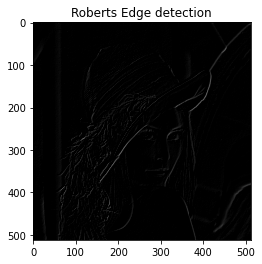

In [11]:
# Roberts
plt.imshow(edge_detection.roberts(grayscale_image), cmap="gray",vmin = 0,vmax = 255)
plt.title("Roberts Edge detection")
plt.show()

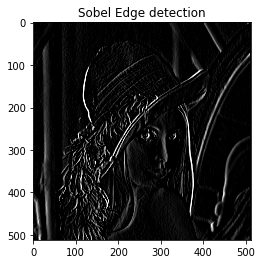

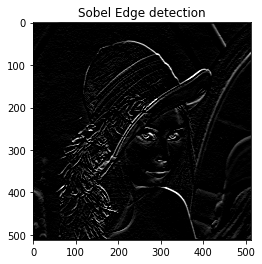

In [12]:
# Sobel
sobel_x,sobel_y = edge_detection.sobel(grayscale_image)
plt.imshow(sobel_x, cmap="gray",vmin = 0,vmax = 255)
plt.title("Sobel Edge detection")
plt.show()
plt.imshow(sobel_y, cmap="gray",vmin = 0,vmax = 255)
plt.title("Sobel Edge detection")
plt.show()

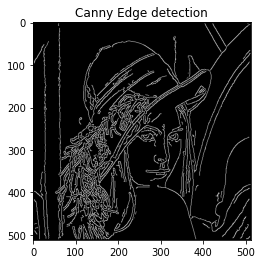

In [13]:
# Canny
plt.imshow(edge_detection.canny(grayscale_image,100,255), cmap="gray")
plt.title("Canny Edge detection")
plt.show()

Image Histogram and Distribution Curve

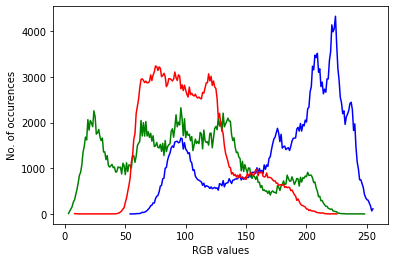

In [14]:
graphs.histogram(image)

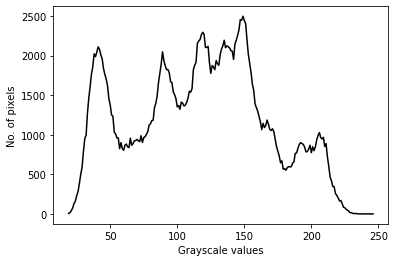

In [15]:
graphs.histogram(grayscale_image)

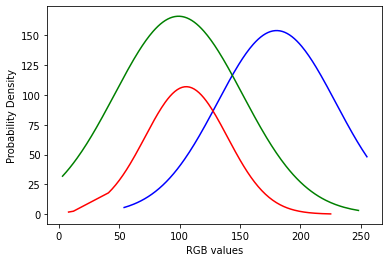

In [16]:
graphs.distribution_curve(image)

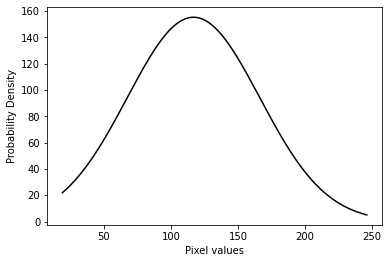

In [17]:
graphs.distribution_curve(grayscale_image)

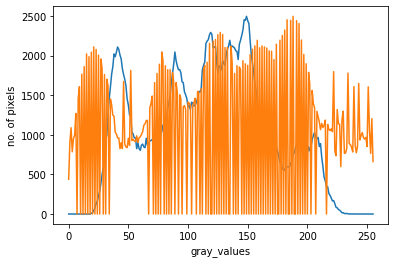

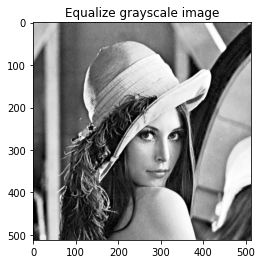

In [18]:
# Equalize image
equalization.equalize(grayscale_image)
equaled_hist = equalization.Histogram (grayscale_image)
plt.show()
plt.imshow(grayscale_image, cmap="gray")
plt.title("Equalize grayscale image")
plt.show()

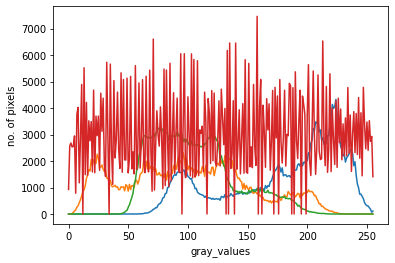

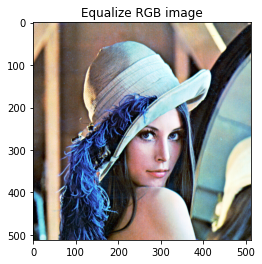

In [19]:
equalization.equalize(image)
equaled_hist = equalization.Histogram (image)
plt.show()
plt.imshow(image)
plt.title("Equalize RGB image")
plt.show()

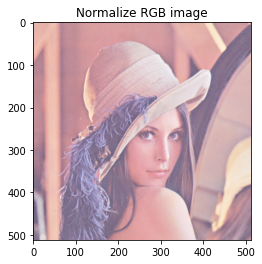

In [20]:
# Normalize RGB image
img = Image.open("images/lenna.png")
new_max = 255
new_min = 100
normalization.normalize(img ,new_max ,new_min)
plt.imshow(img)
plt.title("Normalize RGB image")
plt.show()

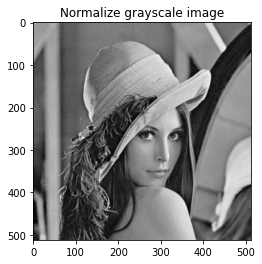

In [21]:
img = img.convert('L')
new_max = 255
new_min = 100
normalization.normalize(img ,new_max ,new_min)
plt.imshow(img, cmap="gray")
plt.title("Normalize grayscale image")
plt.show()

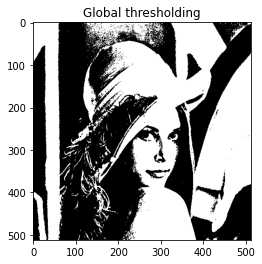

In [22]:
# Global thresholding
global_threshold_image = threshold.threshold(grayscale_image, "global", 125)
plt.imshow(global_threshold_image, cmap="gray")
plt.title("Global thresholding")
plt.show()

d:\4th year 2nd term\cv\tasks\task1\task1\task1_mo3eed\assignment-1-cv-2022-sbe-404-team_15\libs\threshold.py:52: RuntimeWarning: overflow encountered in ulong_scalars
  sum_ = int_img[y2, x2] - int_img[y1, x2] - int_img[y2, x1] + int_img[y1, x1]


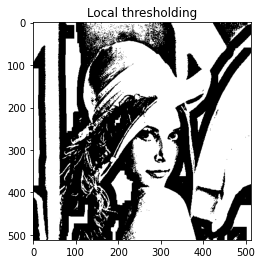

In [23]:
# Local thresholding
local_threshold_image = threshold.threshold(grayscale_image, "local", 15)
plt.imshow(local_threshold_image, cmap="gray")
plt.title("Local thresholding")
plt.show()

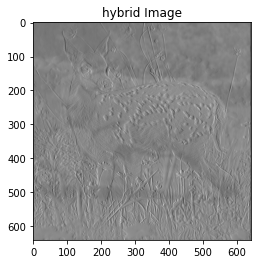

In [24]:
image = cv2.imread("images/elephant.jpg")
gray_scale_image = filters.grayscale(image)

image2 = cv2.imread("images/deer.png")
gray_scale_image2 = filters.grayscale(image2)

hybrid_img = filters.hybrid(gray_scale_image , gray_scale_image2)
plt.imshow(hybrid_img,cmap="gray")
plt.title("hybrid Image")
plt.show()

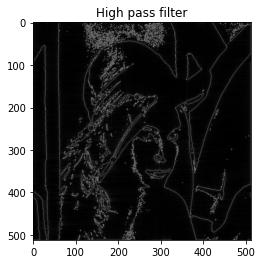

In [25]:
#Frequency domain high pass filter

rows,cols = np.shape(grayscale_image)
fourierImage = fft.fft2(np.array(grayscale_image))
imgShift = fft.fftshift(fourierImage)
highPassImage = fft.highPassFiltering(imgShift,200)

plt.imshow(np.abs(fft.ifft2(fft.fftshift(highPassImage),rows,cols)),cmap = "gray")
plt.title("High pass filter")
plt.show()

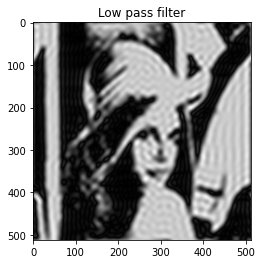

In [26]:
#Frequency domain low pass filter
imgShift = fft.fftshift(fourierImage)
lowPassImage = fft.lowPassFiltering(imgShift,50)

plt.imshow(np.abs(fft.ifft2(fft.fftshift(lowPassImage),rows,cols)),cmap = "gray")
plt.title("Low pass filter")
plt.show()

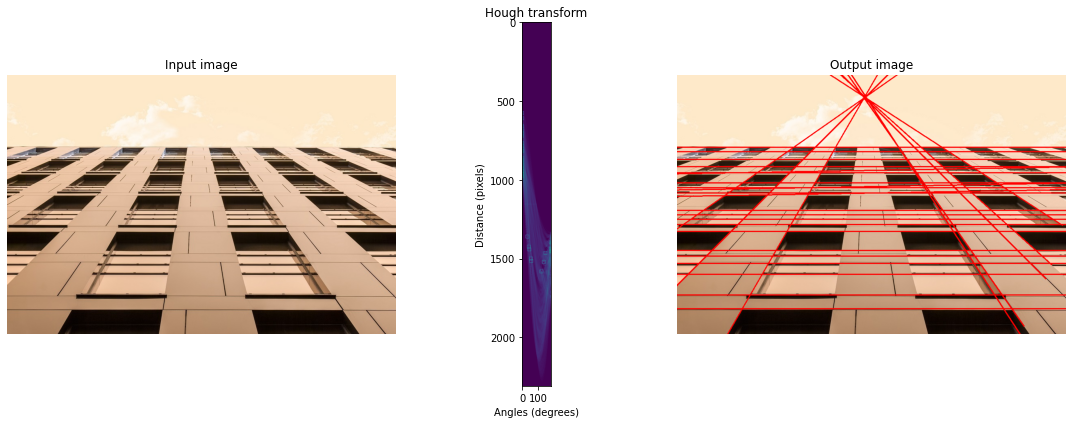

In [27]:
img = cv2.imread("images/building2.jpg")

copImg = np.copy(img)

houghSpace, thetas, rhos = hough.houghLine(img)

numPeaks = 30
indicies, H = hough.hough_peaks(houghSpace, numPeaks, nhood_size=20)  # find peaks
hough.hough_lines_draw(img, indicies, rhos, thetas)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(copImg)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(houghSpace)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img)
ax[2].set_title('Output image')
ax[2].set_axis_off()


plt.tight_layout()
plt.show()

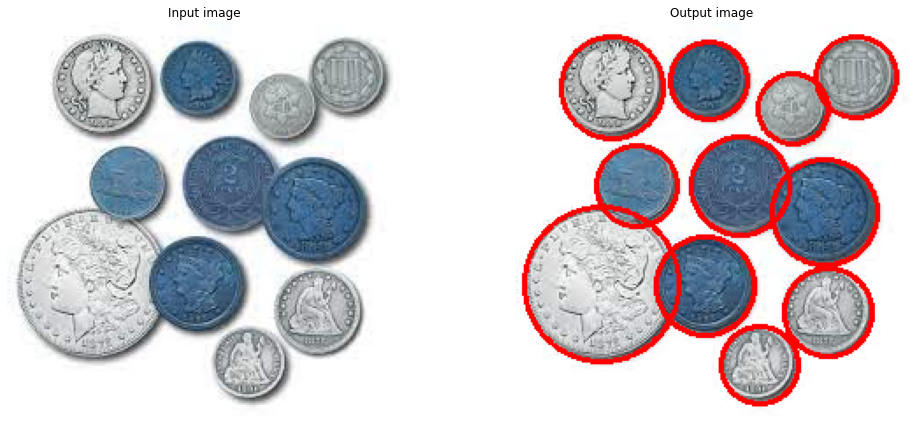

In [28]:
img = cv2.imread("images/coins1.jpg")
copImg =np.copy(img)

min_radius = 2
max_radius = 45
circles  = hough.houghCircle(img, threshold=10, region=15, radius=[max_radius, min_radius]) #threshold = 10,15 
hough.hough_circle_draw(circles , img
 )

# Generating figure 1
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(copImg)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(img)
ax[1].set_title('Output image')
ax[1].set_axis_off()


plt.tight_layout()
plt.show()